# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [46]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [47]:
## View the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [48]:
## View the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [49]:
## Checking the shape of the dataset and returning the dimensions of the DataFrame
df.shape

(100, 6)

#### Observations: 
There are 100 rows and 6 columns in the DataFrame


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations: 
There are different data types in this dataset:

1) User_id is an integer type variable
2) There are 4 object type variables: group, landing_page, converted and language_preferred are object variables
3) Time_spent_on_the_page is a float type variable



In [51]:
## Return statistical summary

df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations: 

1) The minimum time spen on the page was 0.19 muntes and the maximum time spent on the page was 10.71 minutes
2) 25% of the users spent about 3.880 minutes on the page
3) The average time spent on the page is 5.38 minutes with a standard deviation of 2.38 minutes




In [52]:
## Count of unique values for the group variable
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

In [53]:
## Categorical statistical summary
df.describe(include = 'object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [54]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

#### Observations: 

1) The landing_page variable has two unique values, old and new each with 50 entries
2) The group variable has two unique values, control and treatment each with 50 entries 
3) Out of 100, 55 users are converted into subscribers 




In [55]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations: 

There are no null values in this dataset




In [56]:
## Sum of duplicate values in each column
df.duplicated().sum()

0

### Univariate Analysis

#### Group variable




col_0      count
group           
control       50
treatment     50


<Axes: xlabel='group'>

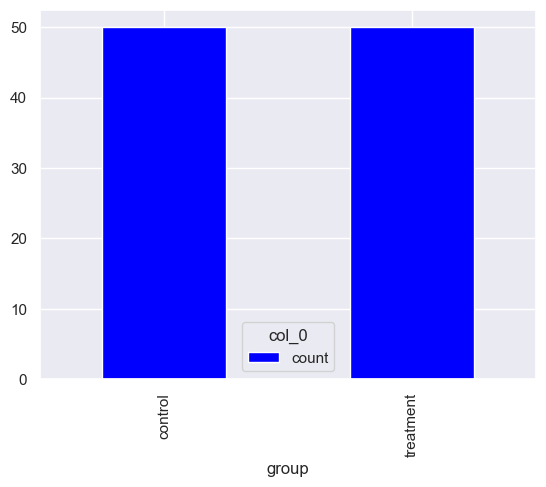

In [63]:
## Analyzaing the group variable

my_group = pd.crosstab(index = df["group"],columns="count") 
print (my_group)
my_group.plot.bar(color='blue')


#### Landing Page




In [57]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

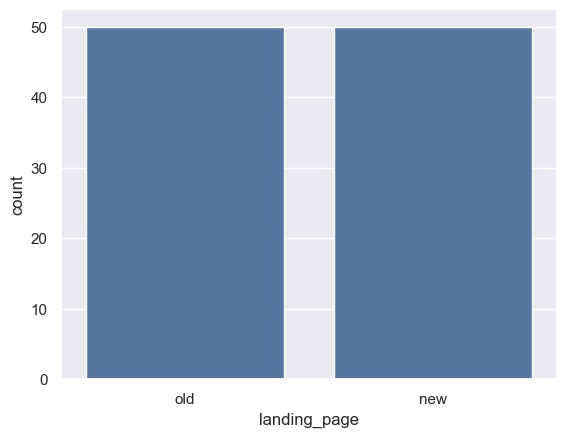

In [58]:
sns.countplot(data=df,x='landing_page')
plt.show()

#### Observations: 

There are no null values in this dataset




### Bivariate Analysis

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

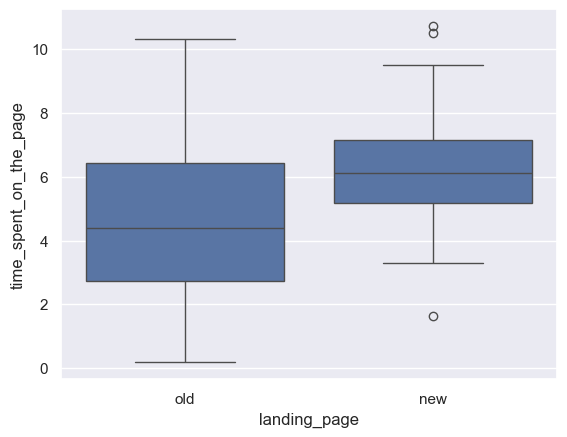

In [67]:
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

H₀
 : Users spend equal time on the old and new landing page.

Hₐ
 : Users spend greater amount of time on the new landing page.

### Step 2: Select Appropriate test

Observable qualities:
1) Test for equlaity of two means
2) Unknown standard deviation
Due to the these above qualities, the Two independent sample t-test should be selected.

### Step 3: Decide the significance level

Significance level  𝛼=0.05

### Step 4: Collect and prepare data

In [71]:
time_new = df.query('landing_page == "new"')['time_spent_on_the_page']
time_old = df.query('landing_page == "old"')['time_spent_on_the_page']

In [ ]:
# find the sample means and sample standard deviations for the two samplesdata.groupby('landing_page').describe()

### Step 5: Calculate the p-value

### Step 6: Compare the p-value with $\alpha$

### Step 7:  Draw inference

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## 3. Is the conversion and preferred language are independent or related?

## 4. Is the time spent on the new page same for the different language users?

## Conclusion and Business Recommendations

___